In [23]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [31]:
#X contains all possible input combinations for the logic gate (two inputs per row).
#y contains the expected output of the logic gate.
#Input [0, 0] produces output 0
#Input [1, 1] produces output 1

datasets = {
 "OR": {
        "X": np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
        "y": np.array([[0], [1], [1], [1]])
    },
    "NOR": {
        "X": np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
        "y": np.array([[1], [0], [0], [0]])
 }
}

In [32]:
#Define the Perceptron Model
#nn.Linear: Implements the single-layer perceptron.
#Input: Two features (since logic gates take two inputs).
#Output: A single value representing the predicted probability.
#nn.Sigmoid: Squashes the output to a range between 0 and 1, making it suitable for binary classification.

class Perceptron(nn.Module):
 def __init__(self):
    super(Perceptron, self).__init__()
    self.fc = nn.Linear(2, 1) # Single-layer perceptron
    self.activation = nn.Sigmoid()
 def forward(self, x):
    x = self.fc(x)
    x = self.activation(x)
    return x

In [33]:
#Training Function The train_perceptron function handles model training:
def train_perceptron(X_train, y_train, num_epochs=1000, lr=0.1):
 X_train_tensor = torch.FloatTensor(X_train)
 y_train_tensor = torch.FloatTensor(y_train)
 model = Perceptron()
 criterion = nn.BCELoss()

In [34]:
#Plot Decision Boundary
#The plot_decision_boundary function visualizes the decision boundary learned by the model
def train_perceptron(X_train, y_train, num_epochs=1000, lr=0.1):
    X_train_tensor = torch.FloatTensor(X_train)  # Convert inputs to PyTorch tensors
    y_train_tensor = torch.FloatTensor(y_train)  # Convert outputs to PyTorch tensors

    model = Perceptron()  # Initialize the perceptron model
    criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for classification
    optimizer = optim.SGD(model.parameters(), lr=lr)  # Stochastic Gradient Descent

    losses = []  # Store losses for visualization
    for epoch in range(num_epochs):
        optimizer.zero_grad()  # Clear gradients
        outputs = model(X_train_tensor)  # Forward pass
        loss = criterion(outputs, y_train_tensor)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        losses.append(loss.item())  # Log the loss
        if (epoch + 1) % 100 == 0:
            print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}')

    return model, losses


In [37]:
def plot_decision_boundary(model, X, y, title):
    xx, yy = np.meshgrid(np.linspace(-0.2, 1.2, 100), np.linspace(-0.2, 1.2, 100))
    grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    with torch.no_grad():
        Z = model(grid).reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.6, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', cmap='coolwarm')
    plt.title(title)
    plt.show()


Training Perceptron for OR gate...
Epoch 100/1000, Loss: 0.3939
Epoch 200/1000, Loss: 0.2996
Epoch 300/1000, Loss: 0.2395
Epoch 400/1000, Loss: 0.1983
Epoch 500/1000, Loss: 0.1686
Epoch 600/1000, Loss: 0.1462
Epoch 700/1000, Loss: 0.1287
Epoch 800/1000, Loss: 0.1148
Epoch 900/1000, Loss: 0.1035
Epoch 1000/1000, Loss: 0.0941


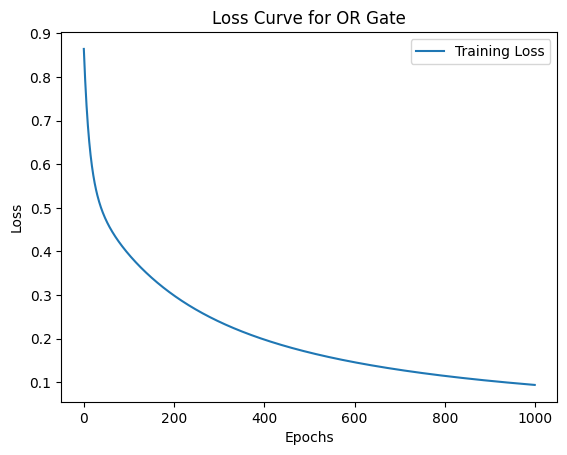

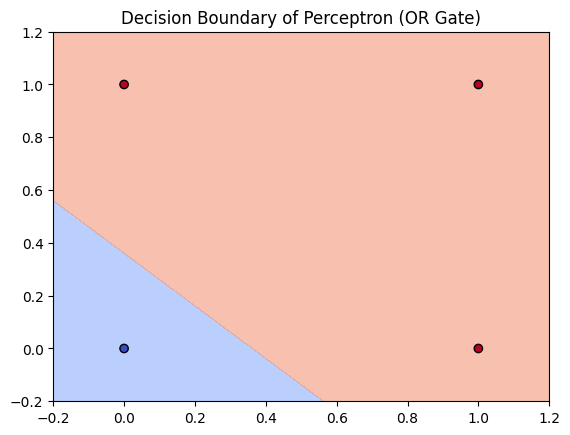

Training Perceptron for NOR gate...
Epoch 100/1000, Loss: 0.3101
Epoch 200/1000, Loss: 0.2458
Epoch 300/1000, Loss: 0.2027
Epoch 400/1000, Loss: 0.1718
Epoch 500/1000, Loss: 0.1486
Epoch 600/1000, Loss: 0.1307
Epoch 700/1000, Loss: 0.1164
Epoch 800/1000, Loss: 0.1048
Epoch 900/1000, Loss: 0.0952
Epoch 1000/1000, Loss: 0.0871


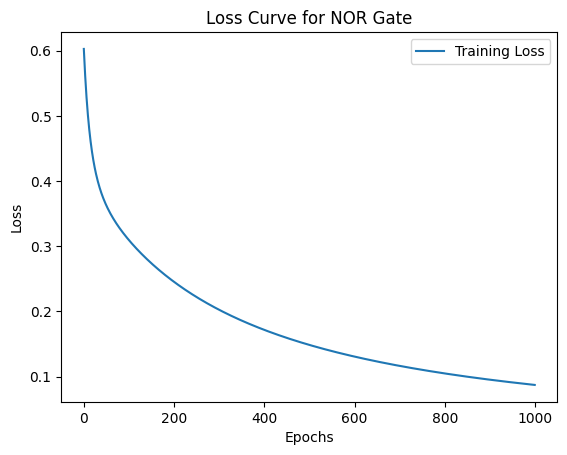

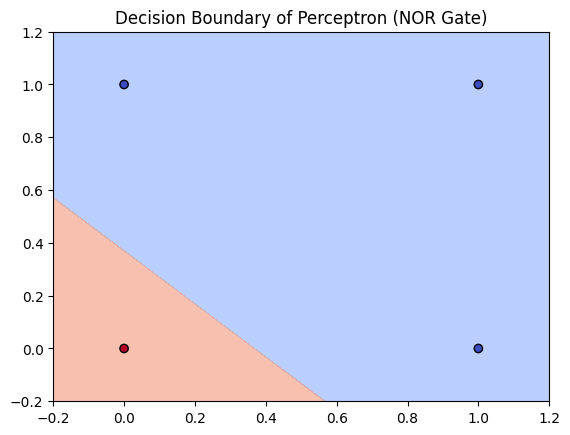

In [38]:
for gate, data in datasets.items():
    print(f'Training Perceptron for {gate} gate...')
    model, losses = train_perceptron(data["X"], data["y"])  # Train the model

    # Plot training loss curve
    plt.plot(range(len(losses)), losses, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss Curve for {gate} Gate')
    plt.legend()
    plt.show()

    # Plot decision boundary
    plot_decision_boundary(model, data["X"], data["y"], f'Decision Boundary of Perceptron ({gate} Gate)')


**NOR and OR Gate Training Using Perceptron Model**

The OR gate outputs 1 when at least one input is 1, while the NOR gate outputs 1 only when both inputs are 0. The datasets for these gates were created as numpy arrays, with inputs [[0, 0], [0, 1], [1, 0], [1, 1]] and corresponding outputs for OR as [[0], [1], [1], [1]] and for NOR as [[1], [0], [0], [0]]. A single-layer perceptron was implemented using PyTorch, with a sigmoid activation function, 2 input features, and 1 output node. The model was trained using Binary Cross-Entropy Loss and Stochastic Gradient Descent with a learning rate of 0.1 for 1000 epochs. The loss curve showed convergence, and the decision boundary visualization confirmed successful classification. This training highlights the perceptron’s ability to solve linearly separable problems, serving as a foundational step in understanding neural networks and binary classification.
